'''
【课程1.7】  相关性分析

分析连续变量之间的线性相关程度的强弱

图示初判 / Pearson相关系数（皮尔逊相关系数） / Sperman秩相关系数（斯皮尔曼相关系数）

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
% matplotlib inline

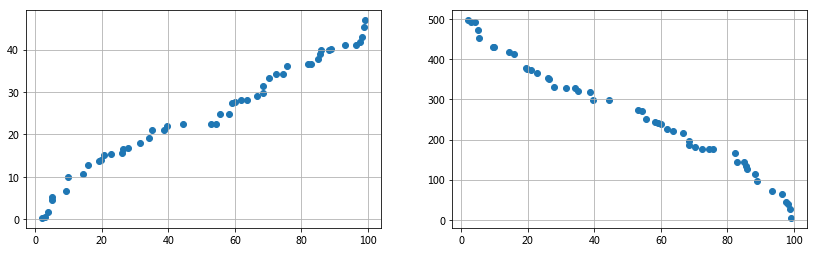

In [5]:
# 图示初判
# （1）变量之间的线性相关性

data1 = pd.Series(np.random.rand(50)*100).sort_values()                    # data1为0-100的随机数并从小到大排列
data2 = pd.Series(np.random.rand(50)*50).sort_values()                     # data2为0-50的随机数并从小到大排列
data3 = pd.Series(np.random.rand(50)*500).sort_values(ascending=False)     # data3为0-500的随机数并从大到小排列

fig = plt.figure(figsize=(14,4))        # 正线性相关
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(data1,data2)
plt.grid()

ax2 = fig.add_subplot(1,2,2)            # 负线性相关
ax2.scatter(data1,data3)
plt.grid()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254F2DB4CF8>,
      dtype=object)

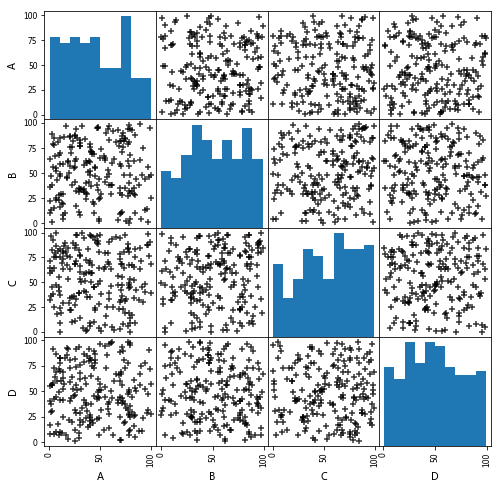

In [7]:
# 图示初判
# （2）散点图矩阵初判多变量间关系

data = pd.DataFrame(np.random.rand(200,4)*100,columns=['A','B','C','D'])
pd.plotting.scatter_matrix(data,
                           figsize=(8,8),
                           c = 'k',
                           marker = '+',
                           diagonal='hist',
                           alpha=0.8,
                           range_padding=0.1)
data.head()

In [12]:
# Pearson相关系数

# 用于正态分布的数据找出其相关性

data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,                                   # 创建样本数据
                     'value2':data2.values})
print(data.head())
print('------')

u1,u2 = data['value1'].mean(),data['value2'].mean()
std1,std2 = data['value1'].std(),data['value2'].std()

print('value1的正态检验:\n',stats.kstest(data['value1'],'norm',(u1,std1)))    # 查看是否是正态分布
print('value2的正态检验:\n',stats.kstest(data['value2'],'norm',(u2,std2)))

data['(x-u1)*(y-u2)'] = (data['value1']-u1)*(data['value2']-u2)               # 制作Pearson相关系数求值表
data['(x-u1)**2'] = (data['value1']-u1)**2
data['(x-u2)**2'] = (data['value2']-u2)**2
print(data.head())

r = data['(x-u1)*(y-u2)'].sum()/(np.sqrt(data['(x-u1)**2'].sum()*data['(x-u2)**2'].sum()))
print('Pearson相关系数为：%.4f' % r)                                           # 求出r
                                                                               # |r| > 0.8 → 高度线性相关

     value1    value2
0  0.797749  0.488489
1  1.103864  0.893887
2  1.527248  2.356452
3  2.335044  2.951968
4  2.441238  4.477149
------
value1的正态检验:
 KstestResult(statistic=0.08810243329969003, pvalue=0.39959937045471006)
value2的正态检验:
 KstestResult(statistic=0.10051438180172767, pvalue=0.24791485497200094)
     value1    value2  (x-u1)*(y-u2)    (x-u1)**2   (x-u2)**2
0  0.797749  0.488489    1059.406581  1878.823706  597.364351
1  1.103864  0.893887    1034.476753  1852.380064  577.711978
2  1.527248  2.356452     961.971909  1816.115045  509.543685
3  2.335044  2.951968     918.840109  1747.917685  483.013103
4  2.441238  4.477149     852.903253  1739.049403  418.299766
Pearson相关系数为：0.9945


In [13]:
# Pearson相关系数 - 算法

data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,            # 创建样本数据
                     'value2':data2.values})
print(data.head())
print('------')

data.corr()                                           # pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
                                                      # method默认pearson

     value1    value2
0  1.238751  0.773085
1  1.644195  2.110089
2  2.230149  3.335177
3  2.775248  3.348998
4  3.310607  3.674871
------


,value1,value2
value1,1.00000,0.98856
value2,0.98856,1.00000


In [17]:
# Sperman秩相关系数

# 用于非正态分布的数据找出其相关性

data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)             
print('------')

data.sort_values('智商',inplace=True)                    # “智商”、“每周看电视小时数”重新按照从小到大排序，并设定秩次index
data['range1'] = np.arange(1,len(data)+1)
data.sort_values('每周看电视小时数',inplace=True)
data['range2'] = np.arange(1,len(data)+1)
print(data.head())

data['d'] = data['range1'] - data['range2']
data['d2'] = data['d']**2

print(data)

n = len(data)
rs = 1- 6*(data['d2'].sum()) / (n*(n**2-1))
print('Spearson相关系数为：%.4f' % rs)

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
------
    智商  每周看电视小时数  range1  range2
1   86         0       1       1
8  112         6       9       2
0  106         7       7       3
7  113        12      10       4
9  110        17       8       5
    智商  每周看电视小时数  range1  range2  d  d2
1   86         0       1       1  0   0
8  112         6       9       2  7  49
0  106         7       7       3  4  16
7  113        12      10       4  6  36
9  110        17       8       5  3   9
6   97        20       2       6 -4  16
2  100        27       4       7 -3   9
4   99        28       3       8 -5  25
5  103        29       6       9 -3   9
3  101        50       5      10 -5  25
Spearson相关系数为：-0.1758


In [19]:
# Spearson相关系数 - 算法

data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],     # 创建样本数据
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('------')


data.corr(method='spearman')                                             # 说明两个变量之间基本没有关系


    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
------


,智商,每周看电视小时数
智商,1.000000,-0.175758
每周看电视小时数,-0.175758,1.000000
